# Carregando dados

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('/content/dados limpos.csv')

df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Total.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.55
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.30


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

# 🛠️ Preparação dos Dados

<h2> Removendo coluna 'customerID' </h2>

In [53]:
df = df.drop(['customerID'], axis=1)

df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Total.Daily
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


In [54]:
df.isnull().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


<h2>Encoding</h2>

In [55]:
df_clean = df.copy()

cols_to_fix = [ 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_to_fix:
  df_clean[col] = df_clean[col].replace('No internet service', 'No')

categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


df_encoded

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Total.Daily,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.20,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,2.01,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.34,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.17,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.97,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.84,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.55,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.30,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [56]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Total.Daily                                    7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [57]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
Total.Daily,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [58]:
df_encoded = df_encoded.dropna(subset=['Total.Daily', 'account.Charges.Total'])

df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Total.Daily,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


<h2>Verificação da Proporção de Evasão</h2>

In [59]:
churn_proportion = df_encoded['Churn_Yes'].value_counts(normalize=True)*100


print("Proporção de Evasão:")
print(churn_proportion)

Proporção de Evasão:
Churn_Yes
False    73.421502
True     26.578498
Name: proportion, dtype: float64


*Clientes Ativos (Não Evasão): 73,46% do total.*

*Clientes em Evasão (Churn): 26,54% do total.*

# 🎯 Correlação e Seleção de Variáveis

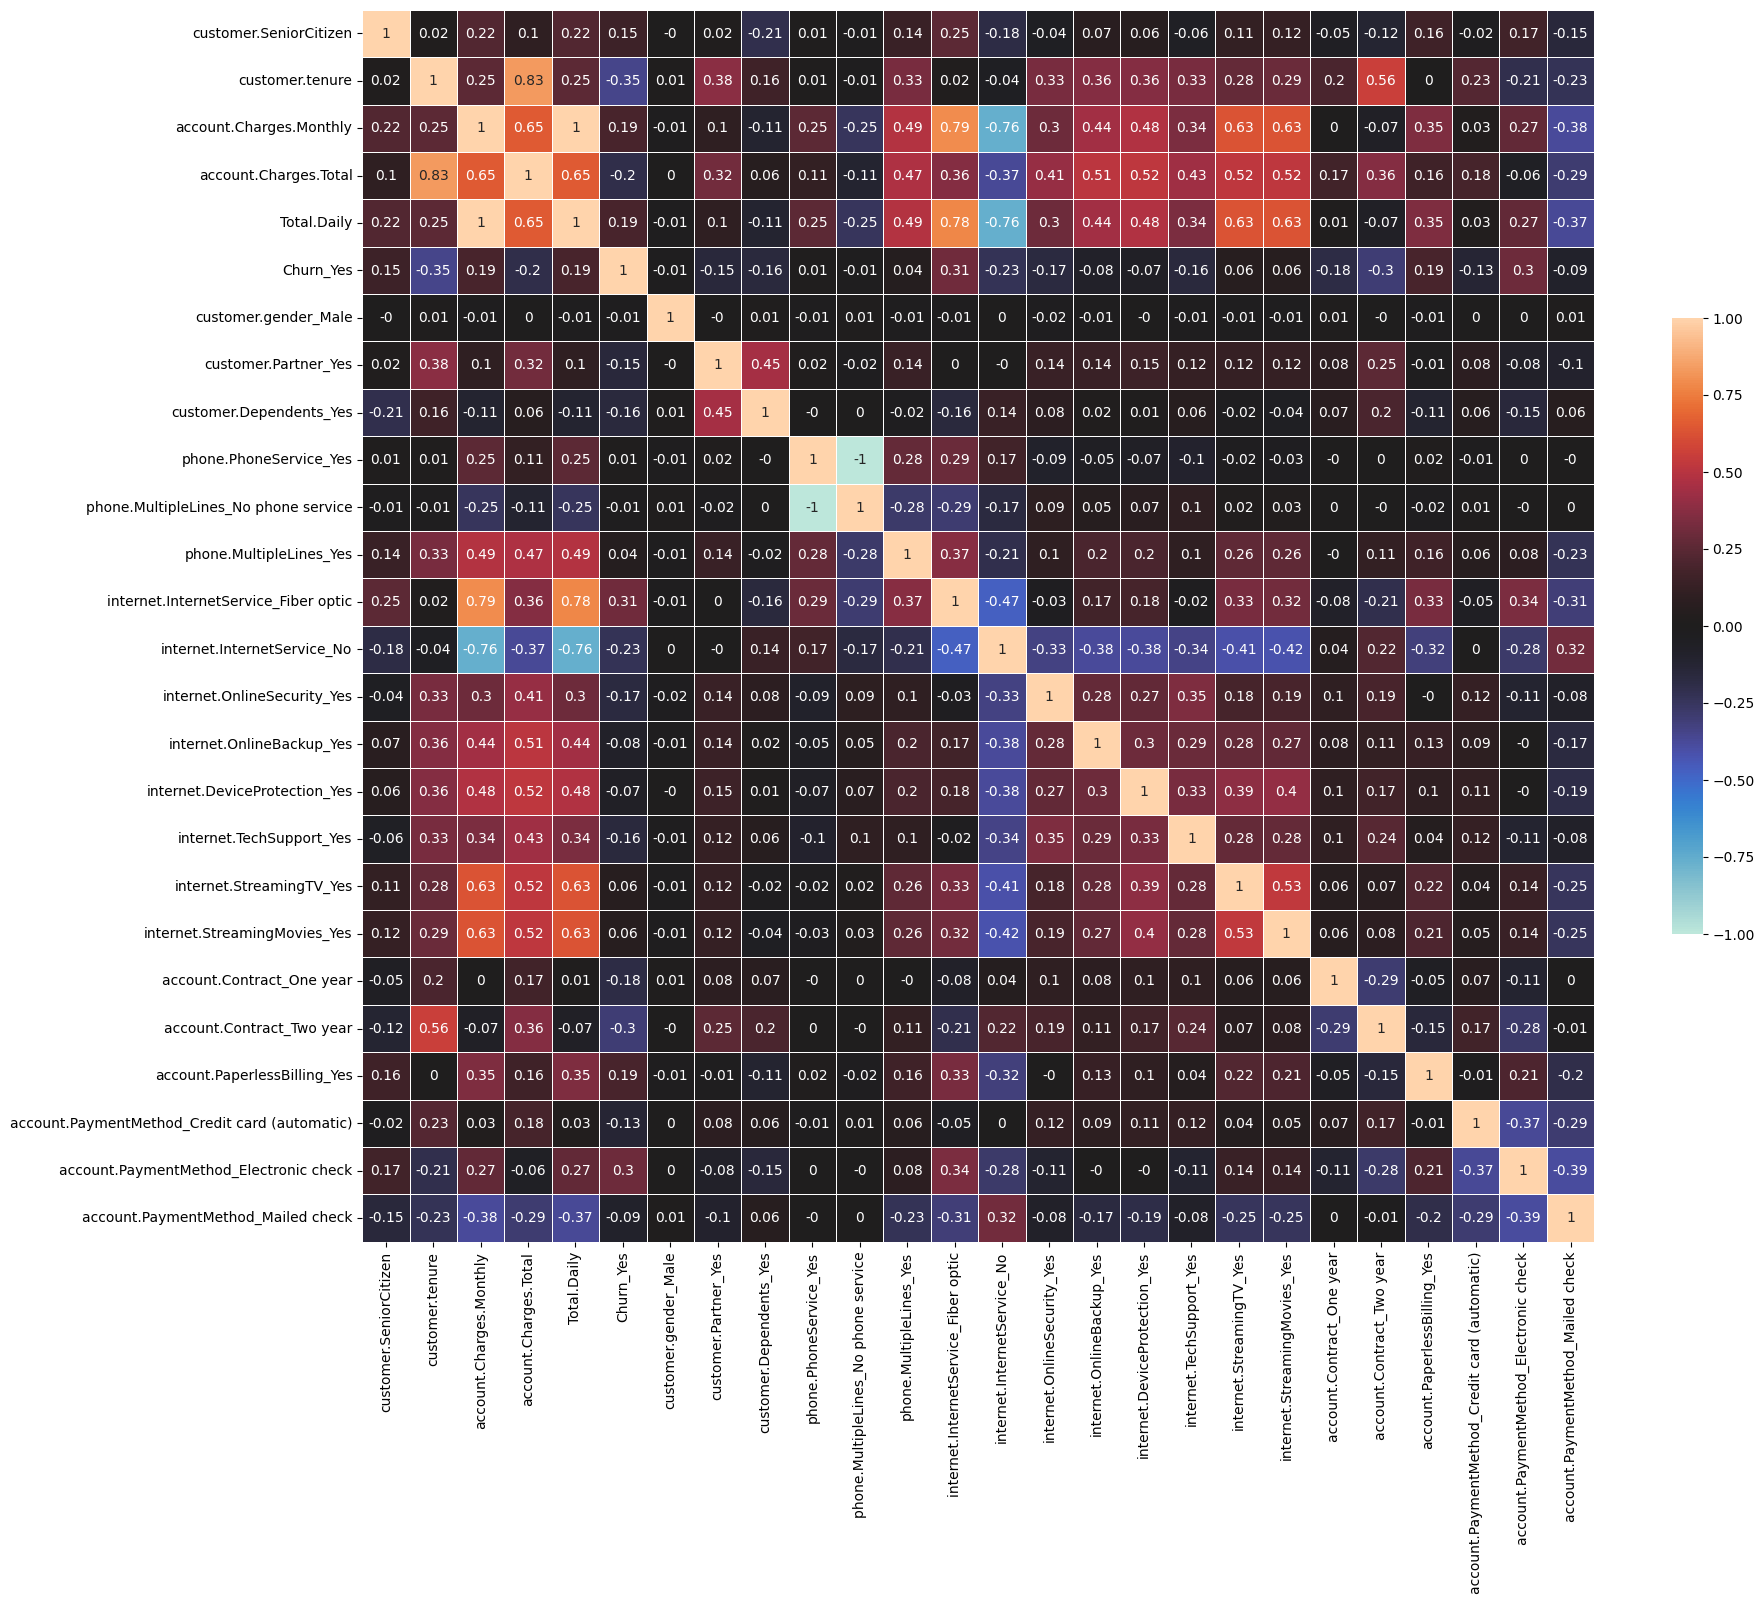

In [60]:
corr = df_encoded.corr()

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

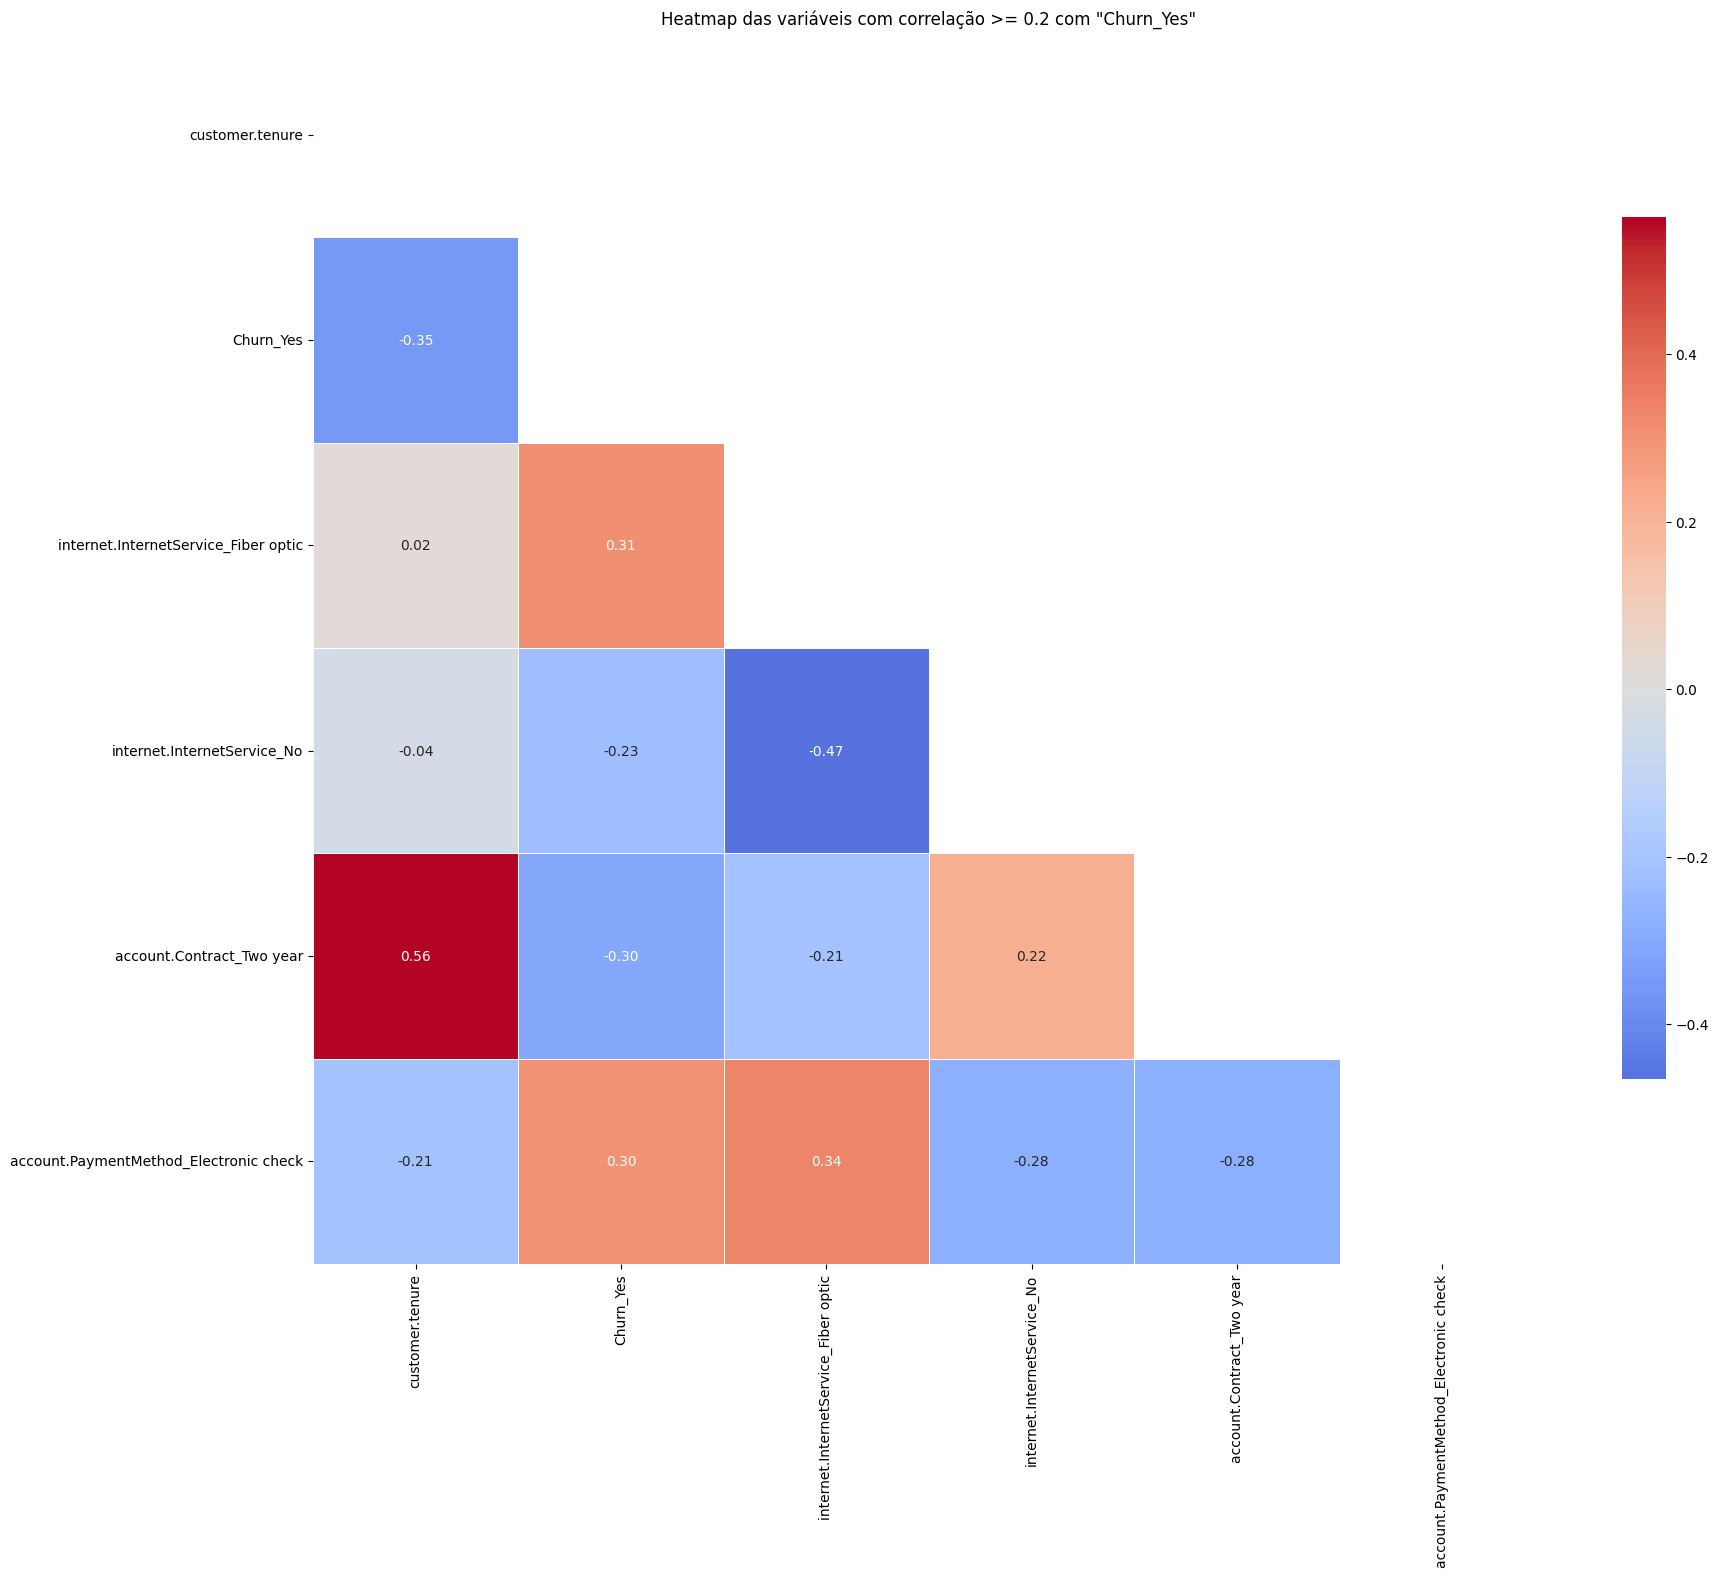

In [61]:
target_var = 'Churn_Yes'

limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr_filtrada, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.7}, mask=mascara)

plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

<h2>Investigação de Variáveis Específicas vs. Evasão</h2>

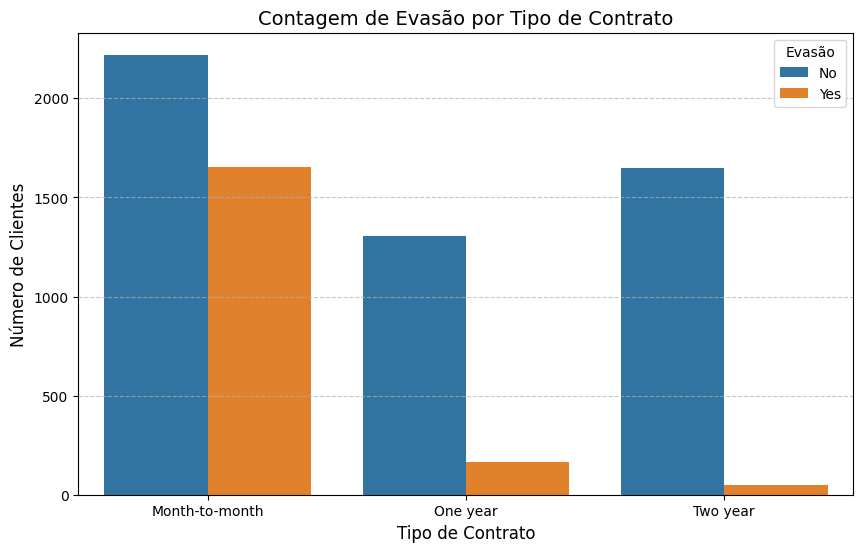

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='account.Contract', hue='Churn', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Contagem de Evasão por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Evasão')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

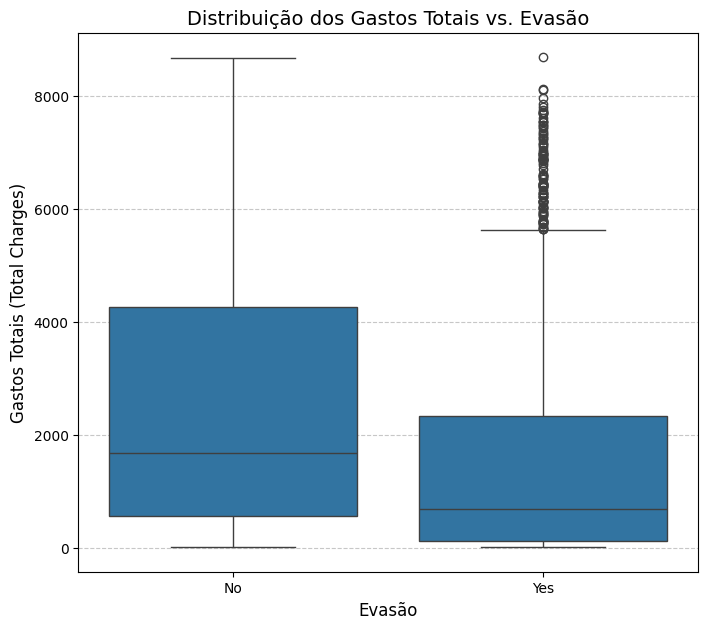

In [63]:
df_cleaned = df.dropna(subset=['account.Charges.Total'])

plt.figure(figsize=(8, 7))
sns.boxplot(data=df_cleaned, x='Churn', y='account.Charges.Total')
plt.title('Distribuição dos Gastos Totais vs. Evasão', fontsize=14)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Gastos Totais (Total Charges)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

✅Regressão Logística:

  *É um excelente modelo de base (baseline) por ser linear, rápido de treinar e altamente interpretável. Seus coeficientes indicam diretamente a influência de cada variável na probabilidade de evasão.*

  *Este modelo exige que os dados de entrada estejam padronizados, pois é sensível à escala das variáveis.*

✅Random Forest:

  *É um modelo mais complexo, baseado em um conjunto de árvores de decisão, o que o torna muito robusto e preciso.*

  *Ele consegue capturar relações não-lineares complexas nos dados e é menos propenso a overfitting do que uma única árvore de decisão.*


✅Necessidade da Normalização/Padronização

Essa etapa foi essencial para o modelo de Regressão Logística pelos seguintes motivos:

 * *Sensibilidade à Escala: A Regressão Logística calcula a probabilidade de evasão com base em uma equação linear ponderada. Se as variáveis tiverem escalas muito diferentes (por exemplo, "customer.tenure", que varia de 1 a 72, e "account.Charges.Monthly", de 20 a 120), o modelo pode atribuir um peso maior às variáveis com valores numericamente mais altos, independentemente de sua real importância preditiva.*

* *Convergência e Estabilidade: A padronização ajuda o algoritmo a convergir mais rapidamente para uma solução ótima e torna o modelo mais estável.*

# 🤖 Modelagem Preditiva

In [64]:
x = df_encoded.drop(columns=['Churn_Yes'])
x_const = add_constant(x)


x_const = x_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = x_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
3,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
5,Total.Daily,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
4,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [65]:
X_filtered = x_const.copy()


cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)


X_filtered.drop(columns=["Total.Daily"], inplace=True)


X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)


X_filtered = X_filtered.astype(float)


vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]


display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [66]:
X_filtered.drop(columns=["account.Charges.Total"], inplace=True)

In [67]:
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtered.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


<h2> Regressão Logística</h2>

In [68]:
x = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train_scaled, y_train)

In [70]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_bal, y_train_bal)

y_pred_lr = lr.predict(x_test_scaled)
y_prob_lr = lr.predict_proba(x_test_scaled)[:, 1]

print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



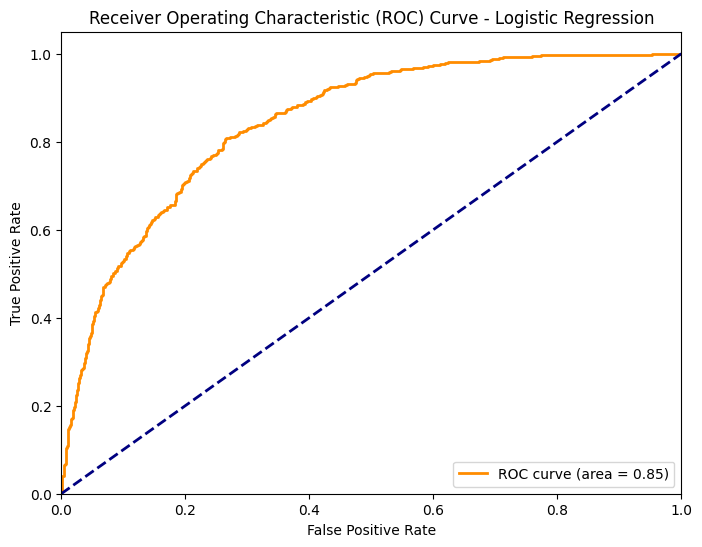

In [71]:
from sklearn.metrics import roc_curve, auc

y_pred_lr_proba = lr.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_proba)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

<h2> Random Forest </h2>

In [72]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_bal, y_train_bal)

y_pred_rf = rf.predict(x_test_scaled)
y_prob_rf = rf.predict_proba(x_test_scaled)[:, 1]

print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7758293838862559
ROC AUC: 0.8223498801480801
Matriz de Confusão:
 [[1300  249]
 [ 224  337]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



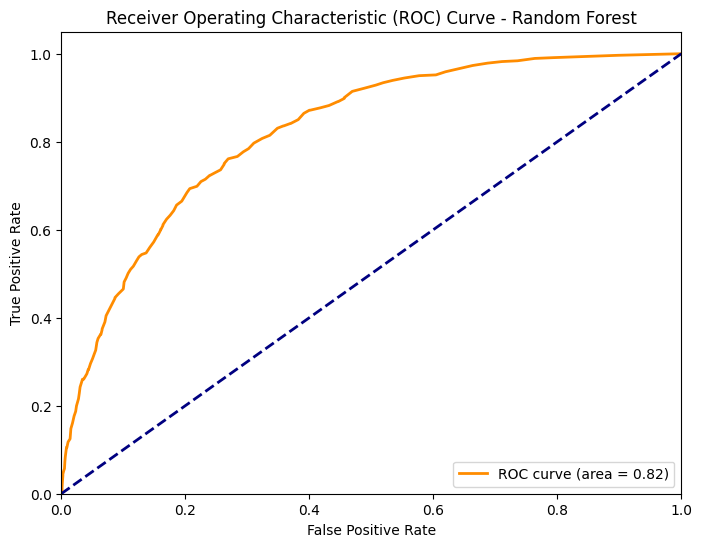

In [73]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

📌**Qual modelo teve o melhor desempenho?**

A escolha do "melhor" modelo depende do objetivo do negócio.

  *Random Forest apresentou a maior acurácia geral (77,6%), o que significa que ele acertou a classificação geral (tanto de quem fica quanto de quem sai) em uma proporção maior de clientes. Sua precisão para prever o churn também foi superior (0,58 vs. 0,52), indicando que, quando ele prevê que um cliente vai sair, ele está mais vezes correto do que a Regressão Logística.*

  *A Regressão Logística, por outro lado, teve um desempenho muito superior no Recall (0,81 vs. 0,60) para a classe "Churn = Sim". Isso significa que o modelo de Regressão Logística foi capaz de identificar 81% de todos os clientes que realmente iriam sair. O F1-Score (0,63) e a curva ROC AUC (0,85) também foram ligeiramente melhores neste modelo, mostrando um bom equilíbrio entre precisão e recall.*

📌**Conclusão sobre o desempenho:**

*Para um problema de evasão de clientes (churn), geralmente é mais importante identificar o maior número possível de clientes que pretendem sair, mesmo que isso signifique classificar incorretamente alguns clientes que ficariam (falsos positivos). Perder um cliente que poderia ser salvo com uma ação de retenção costuma ser mais custoso do que oferecer um benefício a um cliente que já ficaria.*

*Nesse cenário, a Regressão Logística teve o melhor desempenho, pois seu altíssimo Recall de 81% garante que a grande maioria dos "churners" seja capturada, permitindo que a empresa atue sobre eles.*

📌**Análise de Overfitting e Underfitting**

*O notebook não apresenta as métricas de desempenho no conjunto de treino, o que é essencial para um diagnóstico definitivo de overfitting (quando o modelo é bom demais no treino e ruim no teste) ou underfitting (quando o modelo é ruim em ambos). No entanto, podemos fazer algumas inferências:*

* *Random Forest: A acurácia no teste (77,6%) é boa, mas o Recall para churn (60%) é consideravelmente mais baixo que o da Regressão Logística. Modelos de Random Forest são naturalmente mais complexos e propensos a overfitting. É possível que o modelo tenha se ajustado excessivamente aos padrões dos dados de treino, perdendo a capacidade de generalizar e identificar os "churners" nos dados de teste com a mesma eficácia.*

    *  *Possíveis Causas e Ajustes: O modelo foi treinado com os parâmetros padrão. Para combater um possível overfitting, poderíamos ajustar os hiperparâmetros, como limitar a profundidade máxima das árvores ou aumentar o número mínimo de amostras por folha*

* *Regressão Logística: Com uma acurácia de 75% e um excelente Recall de 81%, é improvável que este modelo esteja sofrendo de underfitting, pois ele capturou bem a principal tendência para identificar o churn. A diferença entre a precisão (0,52) e o recall (0,81) mostra um trade-off: o modelo "prefere" arriscar mais falsos positivos para garantir que não perca os verdadeiros positivos, o que é ideal para este problema. O modelo parece bem generalizado.*

In [78]:
feature_names = x.columns
coefficients = lr.coef_[0]
coef_df = pd.DataFrame({'Variável': feature_names, 'Coeficiente': coefficients})
coef_df['Impacto (Absoluto)'] = np.abs(coef_df['Coeficiente'])
coef_df_sorted = coef_df.sort_values(by='Impacto (Absoluto)', ascending=False)
print("--- Variáveis Mais Relevantes (Regressão Logística) ---")
print(coef_df_sorted)
print("\n")


importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
importance_df_sorted = importance_df.sort_values(by='Importância', ascending=False)
print("--- Variáveis Mais Relevantes (Random Forest) ---")
print(importance_df_sorted)

--- Variáveis Mais Relevantes (Regressão Logística) ---
                                         Variável  Coeficiente  \
1                                 customer.tenure    -1.570161   
3                           account.Charges.Total     0.903952   
2                         account.Charges.Monthly    -0.755345   
11           internet.InternetService_Fiber optic     0.748741   
20                      account.Contract_Two year    -0.619592   
12                    internet.InternetService_No    -0.612563   
19                      account.Contract_One year    -0.341570   
17                       internet.StreamingTV_Yes     0.251362   
18                   internet.StreamingMovies_Yes     0.208032   
23         account.PaymentMethod_Electronic check     0.201215   
21                   account.PaperlessBilling_Yes     0.188428   
16                       internet.TechSupport_Yes    -0.150370   
4                                     Total.Daily    -0.121758   
10                  

# Relatório final

**Fatores que Mais Influenciam a Evasão**

A análise preditiva identificou um perfil claro de clientes com alta probabilidade de evasão. Os principais fatores são:

  1. **Tipo e Duração do Contrato:** Clientes com contratos mensais (Month-to-month) são o grupo de maior risco. Em contrapartida, o tempo de permanência (
  customer.tenure) e contratos de longo prazo (dois anos) são os mais fortes indicadores de lealdade.

2. **Padrão de Gastos:** Clientes com gastos mensais (account.Charges.Monthly) elevados, especialmente aqueles com serviço de fibra ótica, apresentam uma taxa de evasão maior. Isso pode indicar uma percepção de baixo custo-benefício ou problemas de qualidade com o serviço mais caro.

3. **Serviços Adicionais:** A ausência de serviços de valor agregado, como segurança online (internet.OnlineSecurity_Yes), está associada a uma maior probabilidade de cancelamento. Clientes com mais serviços integrados tendem a ser mais retidos.

4. **Método de Pagamento:** O pagamento via cheque eletrônico (Electronic check) se destacou como um fator de risco, possivelmente por ser um método menos "comprometido" do que o débito automático em cartão de crédito.

**Estratégias de Retenção Propostas**

Com base nos fatores identificados, propõem-se as seguintes estratégias de retenção:

* **Campanhas de Migração de Contrato:**

    * **Ação:** Criar ofertas proativas para clientes com contrato mensal, incentivando a migração para planos anuais ou de dois anos.

    * **Justificativa:** Ataca diretamente o principal fator de risco de evasão. Um pequeno desconto na mensalidade para um contrato de longo prazo pode garantir a receita do cliente por um período maior.

* **Análise de Satisfação para Clientes de Fibra Ótica:**

  * **Ação:** Realizar pesquisas de satisfação focadas nos clientes de fibra ótica com altas taxas mensais para entender suas principais queixas (preço, instabilidade, atendimento).

  * **Justificativa:** O serviço premium da empresa (fibra) está associado à evasão. É crucial identificar e corrigir a causa raiz, seja ajustando preços ou melhorando a qualidade do serviço.

* **Oferta de Pacotes de Serviços (Bundles):**

  * **Ação:** Oferecer serviços adicionais, como Segurança Online, de forma gratuita por um período experimental ou com desconto significativo para clientes em situação de risco.

  * **Justificativa:** Clientes com mais serviços contratados têm menor probabilidade de sair. Aumentar o "ecossistema" do cliente com a empresa gera maior valor e dificulta a troca por um concorrente.

* **Incentivo para Métodos de Pagamento Automáticos:**

  * **Ação: Oferecer** um pequeno desconto único ou um benefício (ex: upgrade de velocidade por um mês) para clientes que mudarem do cheque eletrônico para o pagamento com cartão de crédito automático.

  * **Justificativa:** Reduz o atrito no pagamento e aumenta o compromisso do cliente, diminuindo um fator de risco secundário, mas relevante.